In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
#Declarar universos de discursos
demanda = ctrl.Antecedent(np.arange(5, 51, 1), 'demanda')
tiempo = ctrl.Antecedent(np.arange(8, 73, 1), 'tiempo')
stock = ctrl.Antecedent(np.arange(70, 201, 1), 'stock')
materia_prima = ctrl.Consequent(np.arange(300, 901, 1), 'materia_prima')

c:\Users\camil\Documents\GitHub\LogicaDifusa\venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


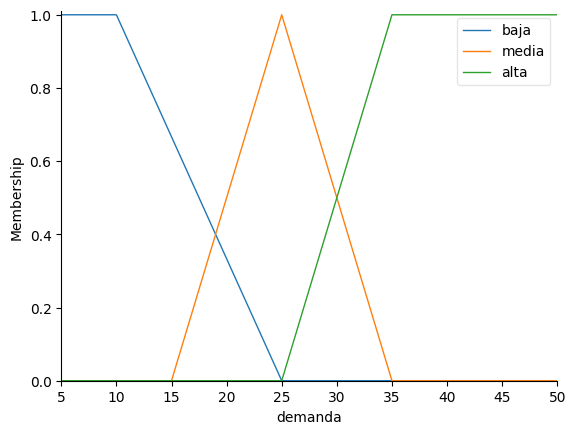

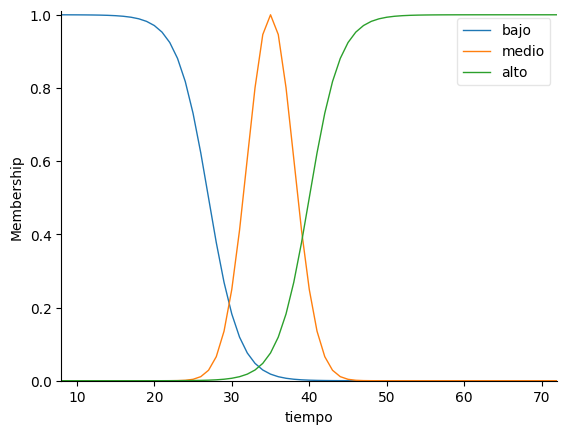

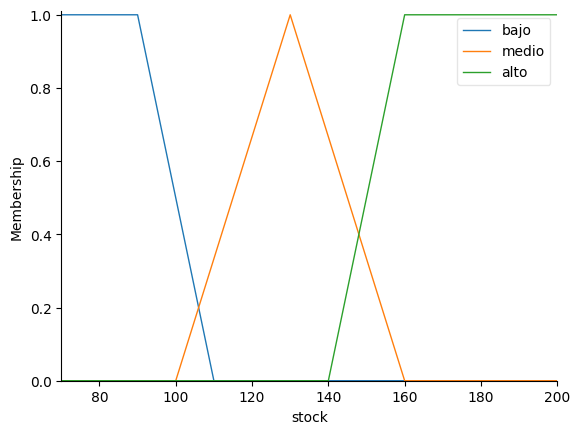

In [4]:
#Conjuntos difusos
demanda['baja'] = fuzz.trapmf(demanda.universe, [5, 5, 10, 25])
demanda['media'] = fuzz.trimf(demanda.universe, [15, 25, 35])
demanda['alta'] = fuzz.trapmf(demanda.universe, [25, 35, 50, 50])
demanda.view()
plt.show()

tiempo['bajo'] = fuzz.sigmf(tiempo.universe, 27, -0.5)
tiempo['medio'] = fuzz.gaussmf(tiempo.universe, 35, 3)
tiempo['alto'] = fuzz.sigmf(tiempo.universe, 40, 0.5)
tiempo.view()
plt.show()

stock['bajo'] = fuzz.trapmf(stock.universe, [70, 70, 90, 110])
stock['medio'] = fuzz.trimf(stock.universe, [100, 130, 160])
stock['alto'] = fuzz.trapmf(stock.universe, [140, 160, 200, 200])

stock.view()
plt.show()

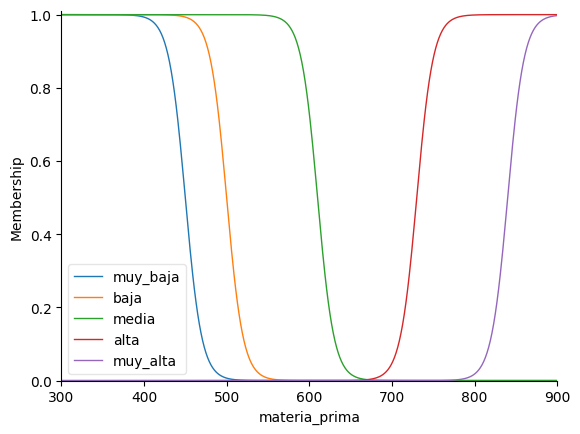

In [5]:
#Definir funcion monotona del consecuente
materia_prima['muy_baja'] = fuzz.sigmf(materia_prima.universe, 450, -0.1)
materia_prima['baja'] = fuzz.sigmf(materia_prima.universe, 500, -0.1)
materia_prima['media'] = fuzz.sigmf(materia_prima.universe, 610, -0.1)
materia_prima['alta'] = fuzz.sigmf(materia_prima.universe, 730, 0.1)
materia_prima['muy_alta'] = fuzz.sigmf(materia_prima.universe, 840,0.1)

materia_prima.view()


In [6]:
#Reglas de inferencia
regla1 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo['bajo'], materia_prima['muy_baja'])
regla2 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo['medio'], materia_prima['muy_baja'])
regla3 = ctrl.Rule((demanda['baja'] | stock['bajo']) & tiempo['alto'], materia_prima['baja'])
regla4 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo['bajo'], materia_prima['muy_baja'])
regla5 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo['medio'], materia_prima['baja'])
regla6 = ctrl.Rule((demanda['baja'] | stock['medio']) & tiempo['alto'], materia_prima['media'])
regla7 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo['bajo'], materia_prima['baja'])
regla8 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo['medio'], materia_prima['media'])
regla9 = ctrl.Rule((demanda['baja'] | stock['alto']) & tiempo['alto'], materia_prima['alta'])
regla10 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo['bajo'], materia_prima['muy_baja'])
regla11 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo['medio'], materia_prima['baja'])
regla12 = ctrl.Rule((demanda['media'] | stock['bajo']) & tiempo['alto'], materia_prima['media'])
regla13 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo['bajo'], materia_prima['baja'])
regla14 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo['medio'], materia_prima['media'])
regla15 = ctrl.Rule((demanda['media'] | stock['medio']) & tiempo['alto'], materia_prima['alta'])
regla16 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo['bajo'], materia_prima['media'])
regla17 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo['medio'], materia_prima['media'])
regla18 = ctrl.Rule((demanda['media'] | stock['alto']) & tiempo['alto'], materia_prima['muy_alta'])
regla19 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo['bajo'], materia_prima['media'])
regla20 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo['medio'], materia_prima['alta'])
regla21 = ctrl.Rule((demanda['alta'] | stock['bajo']) & tiempo['alto'], materia_prima['muy_alta'])
regla22 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo['bajo'], materia_prima['media'])
regla23 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo['medio'], materia_prima['alta'])
regla24 = ctrl.Rule((demanda['alta'] | stock['medio']) & tiempo['alto'], materia_prima['muy_alta'])
regla25 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo['bajo'], materia_prima['media'])
regla26 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo['medio'], materia_prima['alta'])
regla27 = ctrl.Rule((demanda['alta'] | stock['alto']) & tiempo['alto'], materia_prima['muy_alta'])

In [7]:
#Motor de inferencia
materia_ctrl_1 = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, regla8, regla9, regla10, regla11, regla12, regla13, regla14, regla15, regla16, regla17, regla18, regla19, regla20, regla21, regla22, regla23, regla24, regla25, regla26, regla27])

496.83270869954674


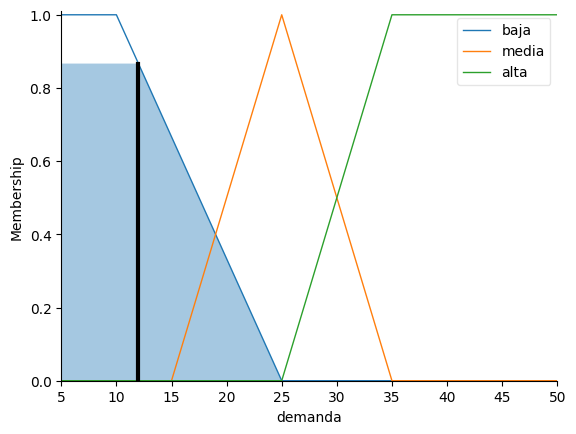

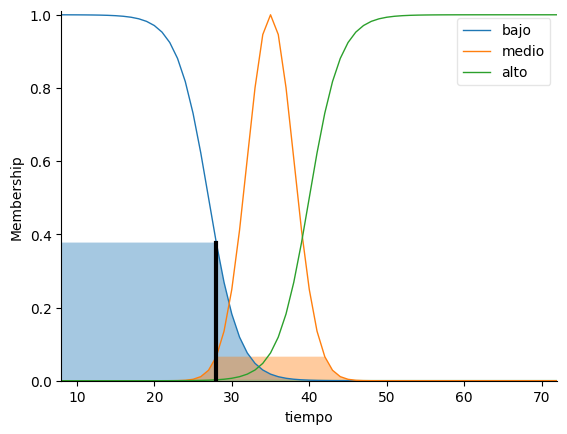

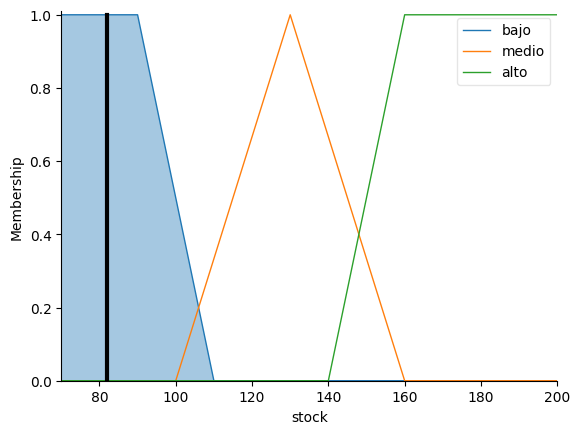

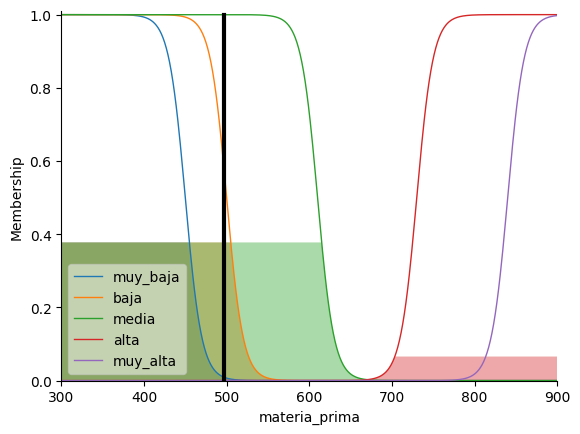

18.293502071320653


In [ ]:
materia_1 = ctrl.ControlSystemSimulation(materia_ctrl_1)

materia_1.input['demanda'] = 12
materia_1.input['tiempo'] = 28
materia_1.input['stock'] = 82

materia_1.compute()
print(materia_1.output['materia_prima'])
demanda.view(sim=materia_1)
tiempo.view(sim=materia_1)
stock.view(sim=materia_1)
materia_prima.view(sim=materia_1)
plt.show()

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_true = 420
y_pred = materia_1.output['materia_prima']
print(mape(y_true, y_pred))
